In [1]:
import pandas as pd

In [3]:
df = pd.read_excel(r"C:\Users\Elisabetta\Desktop\Epicode\Mese 3 - Python\owid-covid-data.xlsx")

In [4]:
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
409637      ZWE    Africa     Zimbabwe  2024-06-12     266365.0        0.0   
409638      ZWE    Africa     Zimbabwe  2024-06-13     266365.0        0.0   
409639      ZWE    Africa     Zimbabwe  2024-06-14     266365.0        0.0   
409640      ZWE    Africa     Zimbabwe  2024-06-15     266365.0        0.0   
409641      ZWE    Africa     Zimbabwe  2024-06-16     266365.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [7]:
df.shape

(409642, 67)

In [9]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
df1 = df.filter(items=['continent', 'new_cases'])

In [13]:
print(df1)

       continent  new_cases
0           Asia        0.0
1           Asia        0.0
2           Asia        0.0
3           Asia        0.0
4           Asia        0.0
...          ...        ...
409637    Africa        0.0
409638    Africa        0.0
409639    Africa        0.0
409640    Africa        0.0
409641    Africa        0.0

[409642 rows x 2 columns]


In [15]:
df2 = df1.query("continent == 'Asia'")

In [17]:
print(df2)

       continent  new_cases
0           Asia        0.0
1           Asia        0.0
2           Asia        0.0
3           Asia        0.0
4           Asia        0.0
...          ...        ...
406387      Asia        0.0
406388      Asia        0.0
406389      Asia        0.0
406390      Asia        0.0
406391      Asia        0.0

[80844 rows x 2 columns]


In [19]:
total = df2['new_cases'].sum()

In [21]:
print(total)

301515124.0


In [133]:
continent_list = df.loc[:, 'continent'].drop_duplicates().tolist()

In [135]:
print(continent_list)

['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'South America']


In [137]:
continent_list = [x for x in continent_list if str(x) != 'nan']

In [139]:
print(continent_list)

['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']


In [141]:
for continent in continent_list:
    somma = df.query(f"continent == '{continent}'")['new_cases'].sum()
    print(continent + ' ' +str(somma))

Asia 301515124.0
Europe 252672573.0
Africa 13144264.0
Oceania 14973467.0
North America 124572945.0
South America 68832646.0


In [239]:
def compare(continent_a, continent_b):
    data_a = df.query(f"continent == '{continent_a}'")
    data_b = df.query(f"continent == '{continent_b}'")
    max_a = data_a['new_cases'].max()
    max_b = data_b['new_cases'].max()
    sum_a = data_a['new_cases'].sum()
    sum_b = data_b['new_cases'].sum()
    media_a = sum_a / len(data_a)
    media_b = sum_b / len(data_b)
    tot = df['new_cases'].sum()
    percentage_a = 100*sum_a / tot
    percentage_b = 100*sum_b / tot
    print('Continente | valore massimo | media | percentuale')
    print(continent_a + f' {max_a} {media_a} {percentage_a}%')
    print(continent_b + f' {max_b} {media_b} {percentage_b}%')

In [241]:
compare('Asia', 'Europe')

Continente | valore massimo | media | percentuale
Asia 40475477.0 3729.5918559200436 9.172142397783896%
Europe 2417043.0 2865.710641821007 7.68634352010298%


In [244]:
import seaborn as sns


In [307]:
data_it = df.query("location == 'Italy'")
data_it_2022 = data_it[data_it["date"].str.contains("2022")]
data_it_2022 = data_it_2022.set_index("date")

<Axes: xlabel='date'>

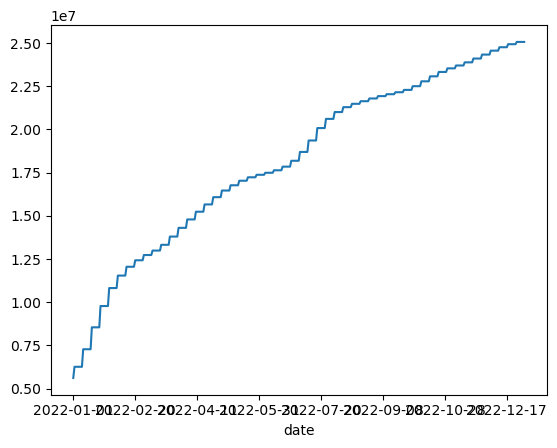

In [309]:
data_it_2022_total_cases = data_it_2022["total_cases"]
data_it_2022_total_cases = data_it_2022_total_cases.transpose()
data_it_2022_total_cases.head()
data_it_2022_total_cases.plot()

<Axes: xlabel='date'>

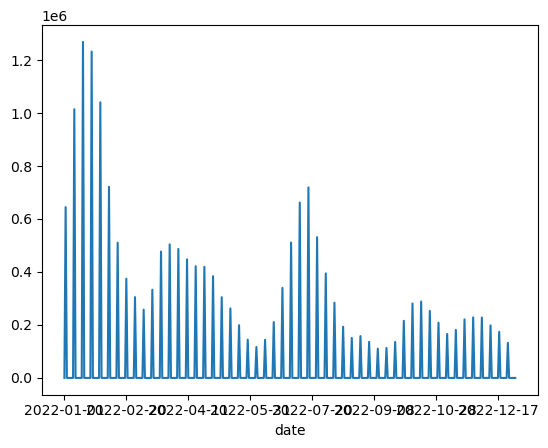

In [311]:
data_it_2022_new_cases = data_it_2022["new_cases"]
data_it_2022_new_cases = data_it_2022_new_cases.transpose()
data_it_2022_new_cases.head()
data_it_2022_new_cases.plot()

In [347]:
data_it_2022_sum_cases = data_it_2022["new_cases"]

sum_cases_list = []
sum_cases = 0
for cases in data_it_2022_sum_cases:
    sum_cases = sum_cases + cases
    sum_cases_list.append(sum_cases)


In [365]:
data_it_2022["sum_cases"]= sum_cases_list

<Axes: xlabel='date'>

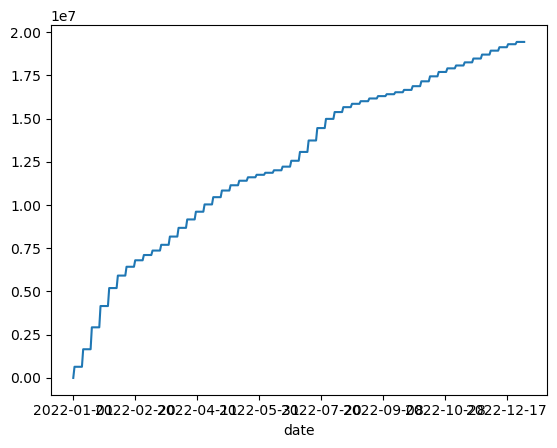

In [371]:
data_it_2022.loc[:,"sum_cases"].plot()

L'andamento coincide con quello dei casi totali.

In [373]:
df.date = pd.to_datetime (df["date"], format = "%Y-%m-%d")

In [375]:
covid_22_23 = df [(df["date"] > "2022-05-01") & (df["date"] < "2023-04-30")]

In [379]:
filtro_italia = df.location =="Italy"
filtro_francia = df.location =="France" 
filtro_germania = df.location =="Germany"
filtro_ita_fra_ger = filtro_italia | filtro_francia | filtro_germania
covid_22_23_ita_fra_ger = covid_22_23.loc[filtro_ita_fra_ger]

In [387]:
icu = covid_22_23_ita_fra_ger.loc[:,["icu_patients", "location"]]

<Axes: >

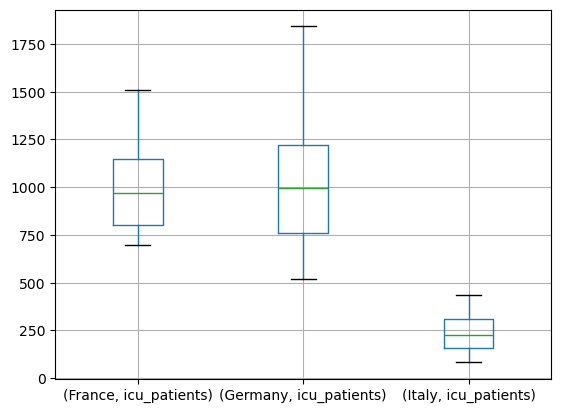

In [393]:
icu.groupby("location").boxplot(subplots=False)

E' possibile notare come i pazienti ICU in italia nel periodo selezionato siano significativamente inferiori a quelli di Francia e Germania.

In [396]:
covid_anno_23 = df [(df["date"] > "2023-01-01") & (df["date"] < "2023-12-31")]

In [398]:
filtro_spagna = df.location =="Spain"

In [400]:
filtro_ita_fra_ger_spa = filtro_italia | filtro_francia | filtro_germania | filtro_spagna

In [402]:
covid_anno_23_ita_fra_ger_spa = covid_anno_23.loc[filtro_ita_fra_ger_spa]

In [404]:
ospedalizzazioni = covid_anno_23_ita_fra_ger_spa.loc [:,["hosp_patients", "location"]]

<Axes: xlabel='location'>

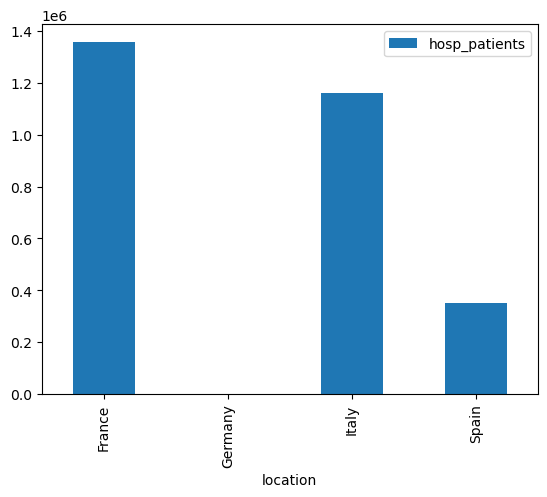

In [410]:
ospedalizzazioni.groupby("location").sum().plot(kind="bar")

la somma dei pazienti ospedalizzati è controintuitiva in quanto tende a falsare i dati contando più volte nel totale lo stesso paziente se questo rimane ospedalizzato per più di un giorno.